<a href="https://colab.research.google.com/github/TanNicholas80/Clustering_Clickstream/blob/main/TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/metopel/')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/metopel/e-shop clothing 2008.csv', sep=';')
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [ ]:
df.shape

(165474, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])
            encoders[col] = label_encoder

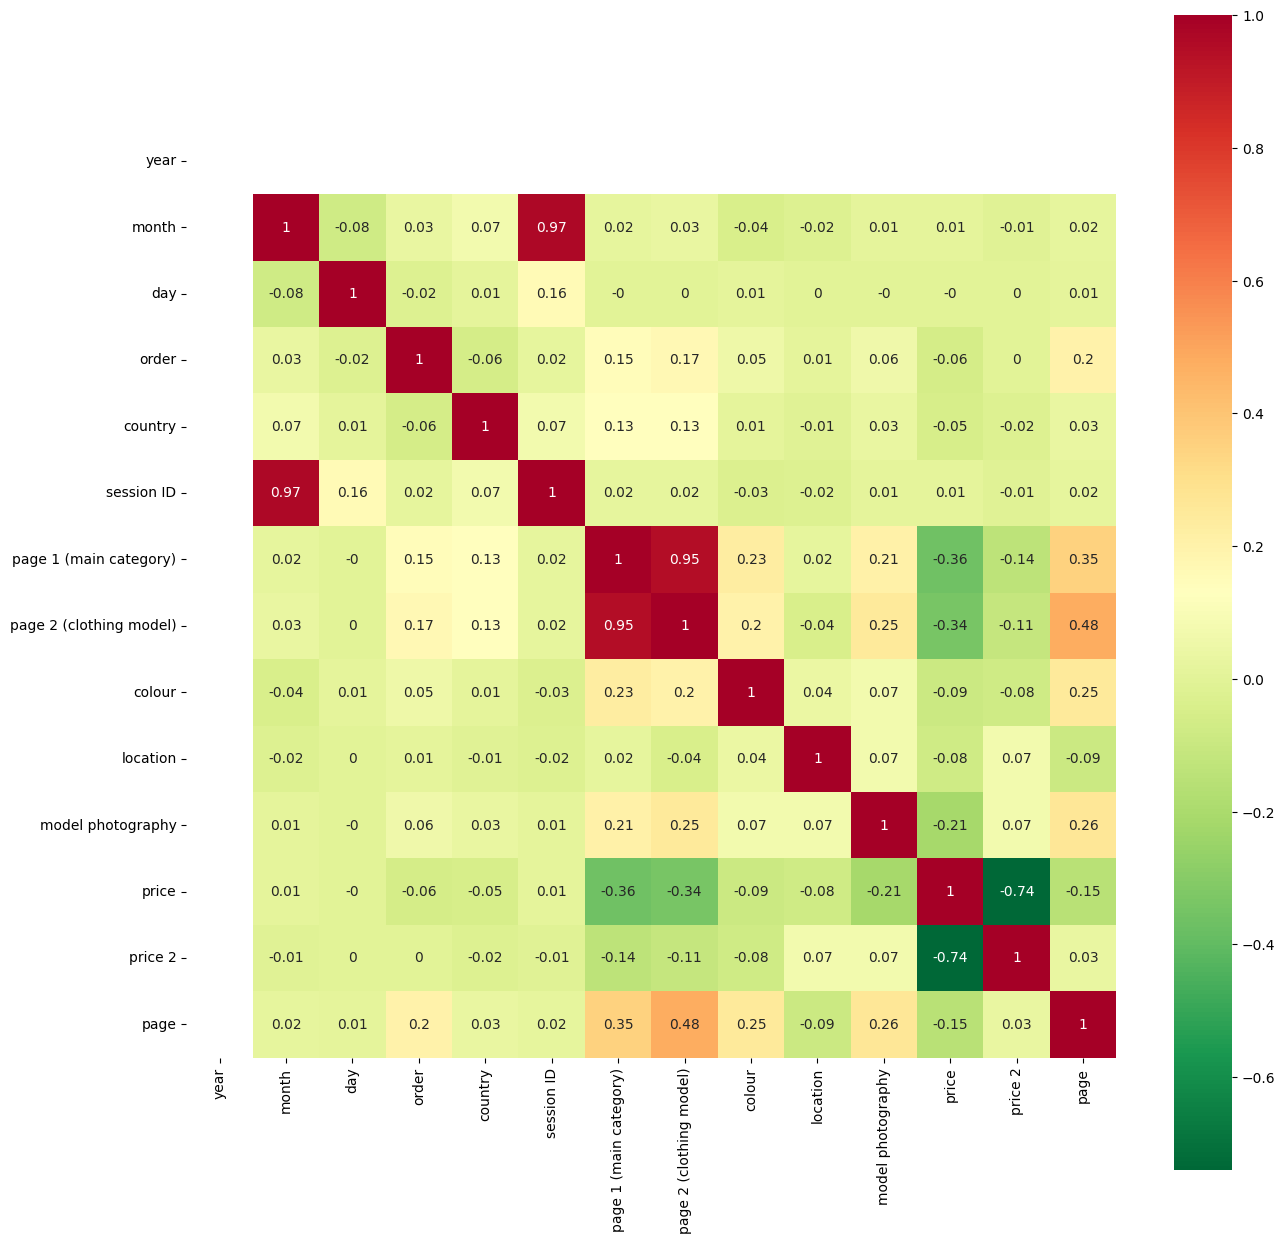

In [ ]:
correlation = df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

**Drop Session ID & Page 2**

In [ ]:
df = df.drop(['year', 'session ID'], axis=1)

In [ ]:
df.head()

,month,day,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,4,1,1,29,1,4,1,5,1,28,2,1
1,4,1,2,29,1,7,1,6,1,33,2,1
2,4,1,3,29,2,70,10,2,1,52,1,1
3,4,1,4,29,2,51,6,6,2,38,2,1
4,4,1,5,29,2,74,4,3,2,52,1,1


In [ ]:
df.describe()

,month,day,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
count,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,5.585887,14.524554,9.817476,26.952621,2.400842,82.742945,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,1.328160,8.830374,13.478411,7.150691,1.144420,59.116265,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,4.000000,7.000000,2.000000,29.000000,1.000000,38.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,5.000000,14.000000,6.000000,29.000000,2.000000,70.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,7.000000,22.000000,12.000000,29.000000,3.000000,132.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,8.000000,31.000000,195.000000,47.000000,4.000000,216.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


# EDA (Exploratory Data Analysis)

**Sales by Month**

In [ ]:
import plotly.graph_objects as go

In [ ]:
sales_by_month = df.groupby('month')['price'].sum()

# Plotting the bar graph
bar_fig = go.Figure([go.Bar(x=sales_by_month.index, y=sales_by_month.values)])
bar_fig.update_layout(title='Sales by Month (Bar Graph)', xaxis_title='Month', yaxis_title='Total Sales')

# Plotting the pie chart
pie_fig = go.Figure([go.Pie(labels=sales_by_month.index, values=sales_by_month.values)])
pie_fig.update_layout(title='Sales by Month (Pie Chart)')

# Show both plots
bar_fig.show()
pie_fig.show()

<ipython-input-16-4bdb87488536>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-16-4bdb87488536>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




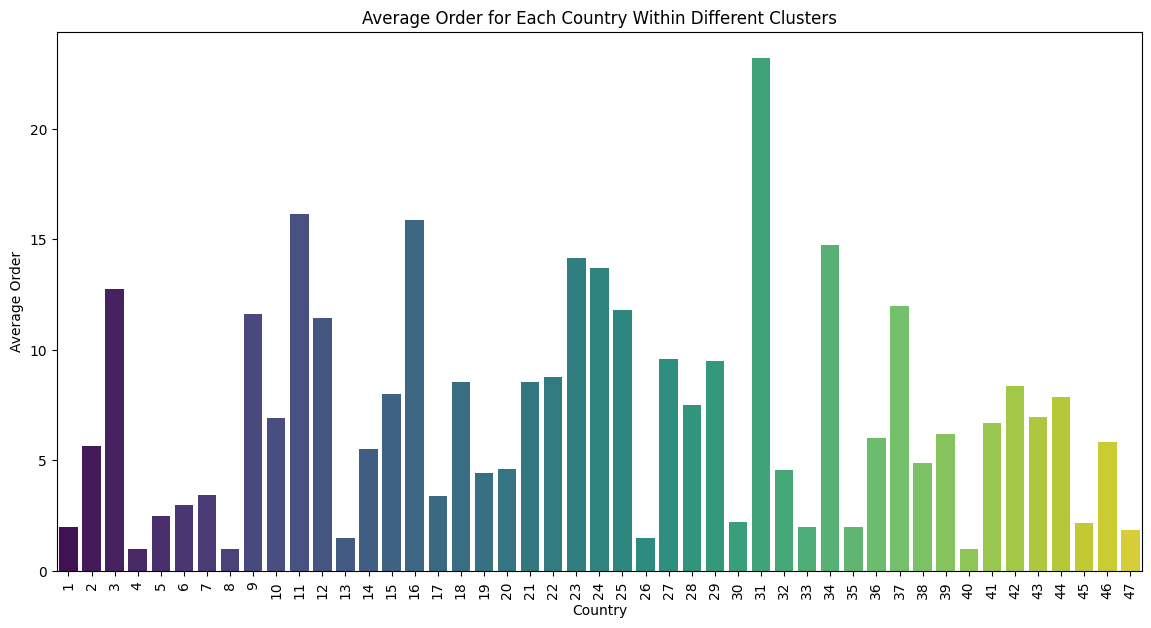

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x='country', y='order', data=df, ci=None, palette='viridis')
plt.title('Average Order for Each Country Within Different Clusters')
plt.xlabel('Country')
plt.ylabel('Average Order')
plt.xticks(rotation=90)
plt.show()

**Cek Korelasi**

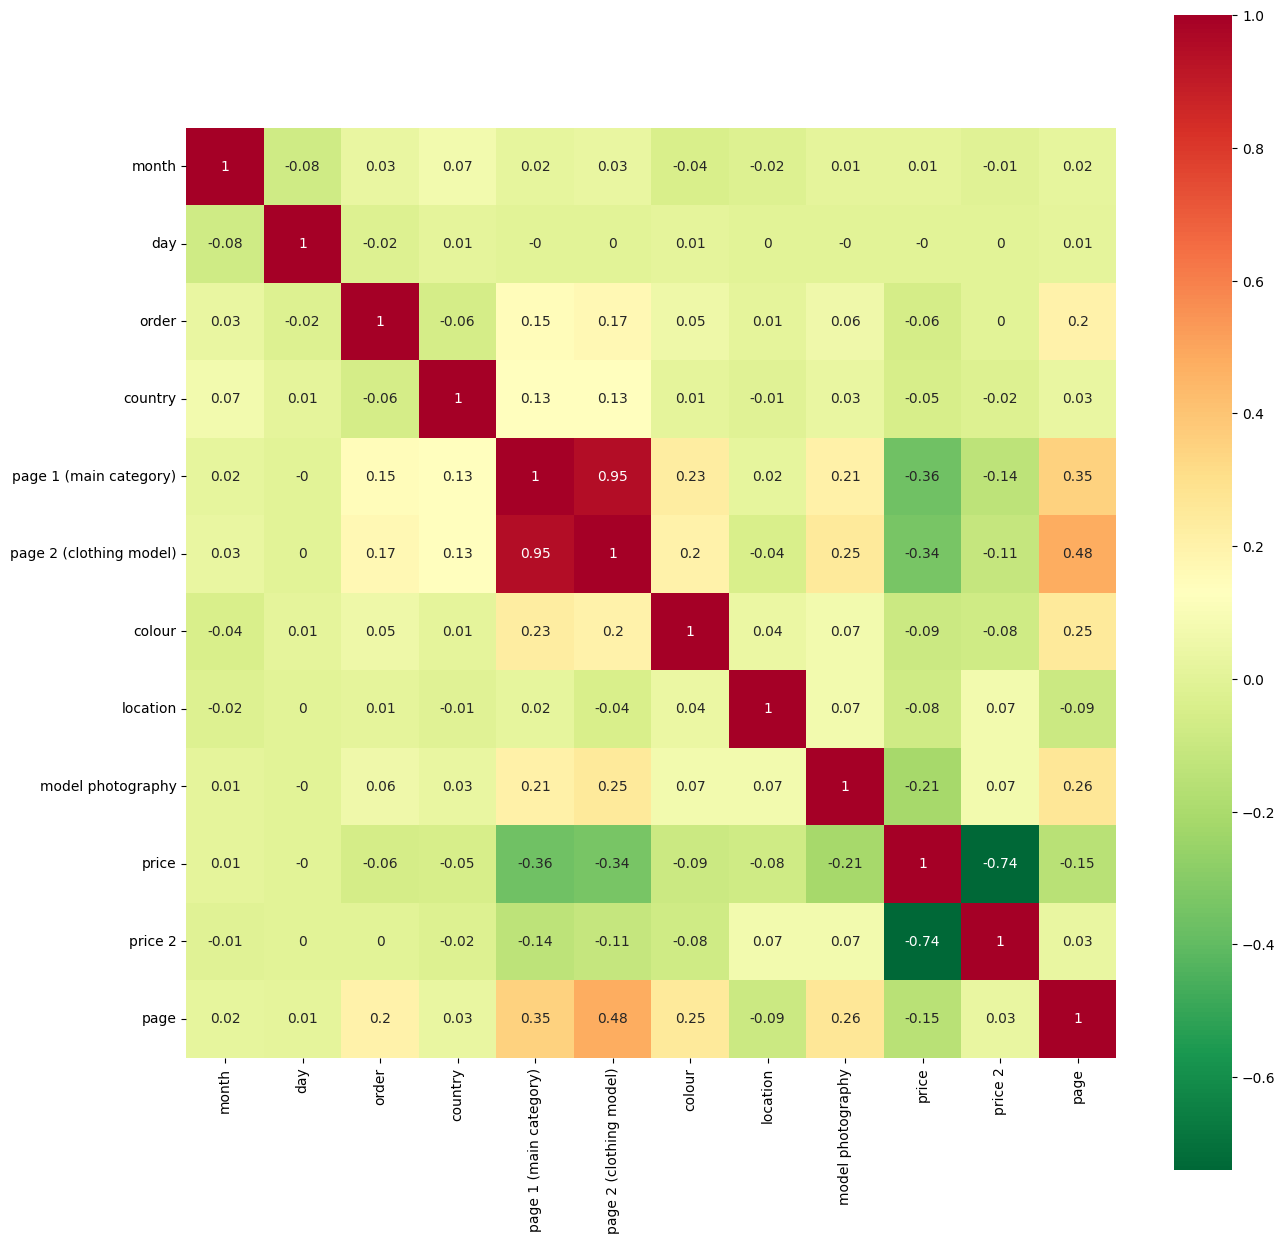

In [ ]:
correlation = df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled_ds = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
scaled_ds.head()

,month,day,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,0.0,0.0,0.000000,0.608696,0.000000,0.018519,0.000000,0.8,0.0,0.156250,1.0,0.0
1,0.0,0.0,0.005155,0.608696,0.000000,0.032407,0.000000,1.0,0.0,0.234375,1.0,0.0
2,0.0,0.0,0.010309,0.608696,0.333333,0.324074,0.692308,0.2,0.0,0.531250,0.0,0.0
3,0.0,0.0,0.015464,0.608696,0.333333,0.236111,0.384615,1.0,1.0,0.312500,1.0,0.0
4,0.0,0.0,0.020619,0.608696,0.333333,0.342593,0.230769,0.4,1.0,0.531250,0.0,0.0


In [ ]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
# hopkin_avg = []
# for i in range(0,100):
a = hopkins(scaled_ds)
# hopkin_avg.append(a)
print(f"Hopkins Statistic: {a}")
# np.array(hopkin_avg).mean()

Hopkins Statistic: 0.9733222015704457


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,165474.0,5.977226e-17,0.533942,-0.952184,-0.494821,0.022124,0.444826,1.266768
col2,165474.0,3.048729e-17,0.526133,-0.927835,-0.339313,-0.096192,0.390903,1.305630


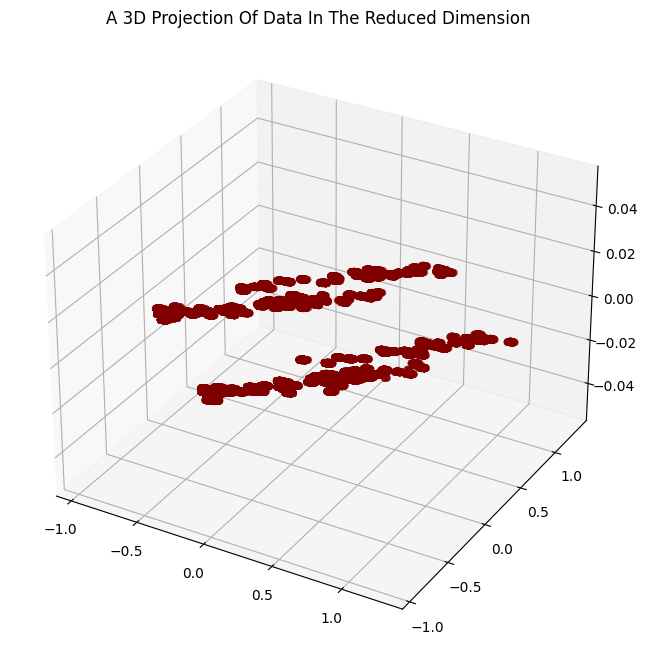

In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

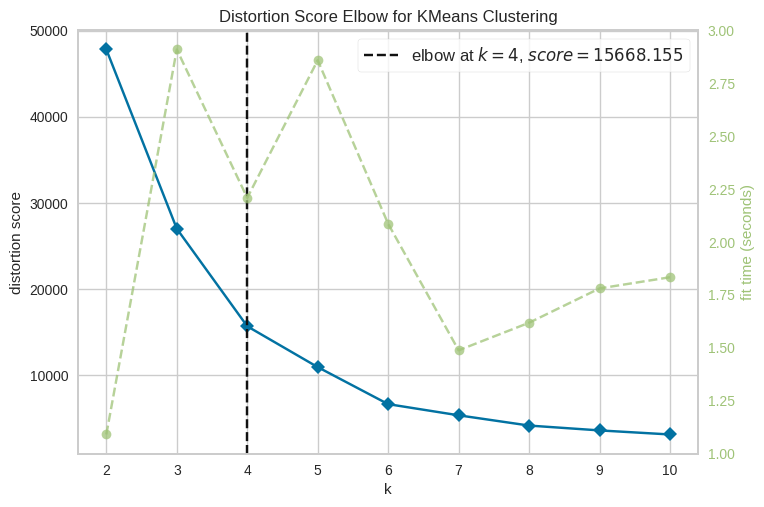

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
model = KMeans(n_clusters=4,
               n_init='auto',
               random_state=0)
yhat_kmean = model.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_kmean
df["Clusters"]= yhat_kmean

In [ ]:
from matplotlib import colors

In [ ]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

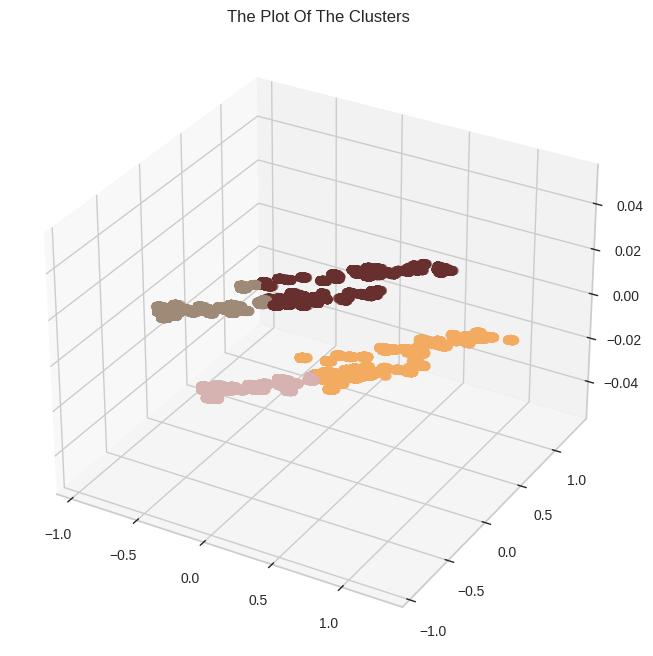

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

<ipython-input-23-7db5fecdf4b8>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




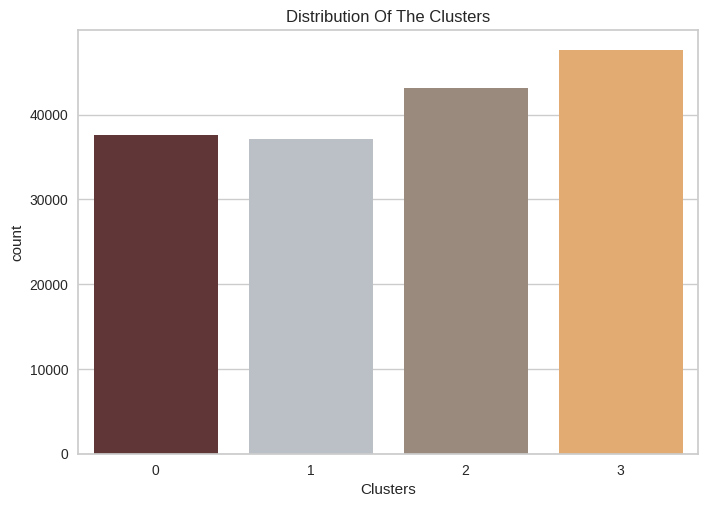

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
df.head()

,month,day,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,Clusters
0,4,1,1,29,1,4,1,5,1,28,2,1,2
1,4,1,2,29,1,7,1,6,1,33,2,1,2
2,4,1,3,29,2,70,10,2,1,52,1,1,1
3,4,1,4,29,2,51,6,6,2,38,2,1,0
4,4,1,5,29,2,74,4,3,2,52,1,1,3


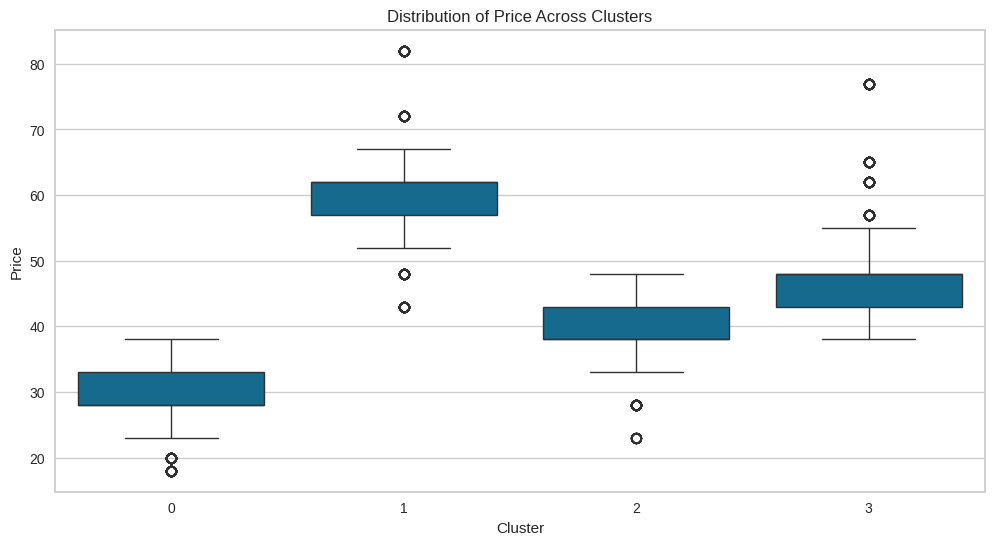

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Clusters', y='price', data=df)
plt.title('Distribution of Price Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.show()

Tingkat spent paling tinggi berada pada cluster 1 karena memiliki median price di titik 60, cluster 2 dengan median sebesar 40, cluster 0 dengan median sebesar 31, cluster 3 dengan median sebesar 45.

<ipython-input-26-4e01355e7b8e>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




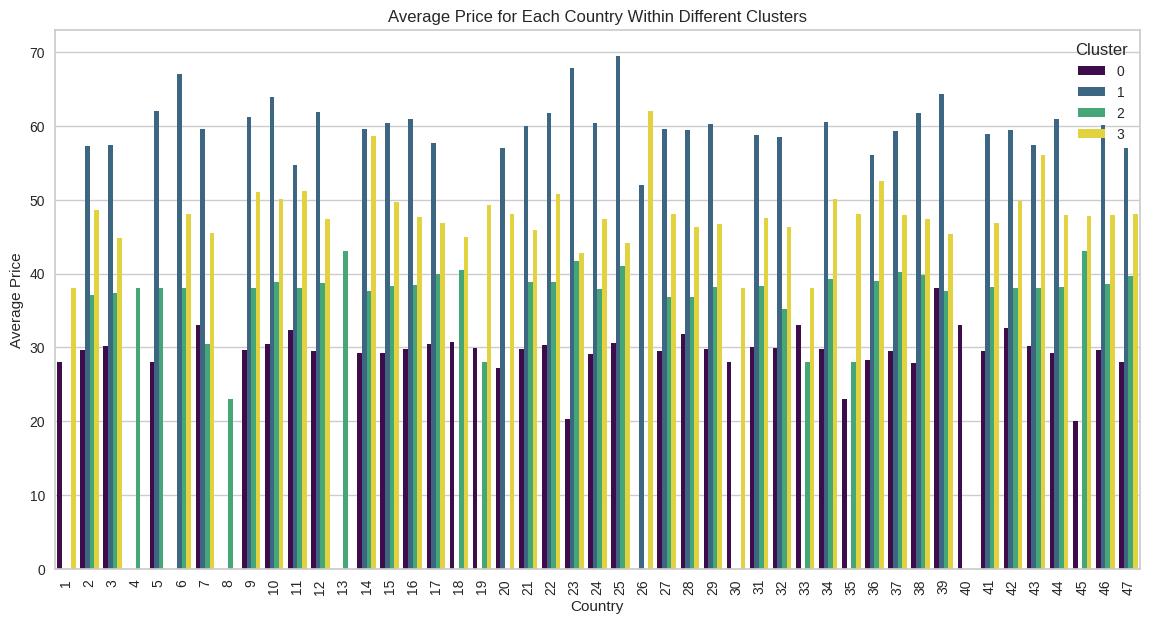

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x='country', y='price', hue='Clusters', data=df, ci=None, palette='viridis')
plt.title('Average Price for Each Country Within Different Clusters')
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.legend(title='Cluster')
plt.xticks(rotation=90)
plt.show()

Tingkat Spend paling tinggi di setiap country berada pada cluster 1

In [ ]:
unique_orders = df['order'].unique()
unique_orders

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
import plotly.express as px

In [ ]:
df8 = df.groupby('Clusters')[['order']].sum()
df8 = df8.sort_values(['order'], ascending=False)

df9 = df.groupby('Clusters')[['order']].count()
df9 = df9.sort_values(['order'], ascending=False)

df8['avreage_clicks'] = df8/df9
df8 = df8.sort_values(['avreage_clicks'], ascending=False)
df8 = df8.query("avreage_clicks > 3 ")
fig = px.scatter(df8, x=df8.index, y="avreage_clicks",
                 size="avreage_clicks", color=df8.index, size_max=60)
fig.show()

Tingkat Orders (Click Sequences) paling tinggi ada pada cluster 0

In [ ]:
import plotly.express as px

# Grouping the data to get the sum and count of orders by Clusters
df9 = df.groupby('Clusters')[['order']].count().sort_values(['order'], ascending=False)

# Grouping the data to see the frequency of main categories in each cluster
category_clicks = df.groupby(['Clusters', 'page 1 (main category)'])['order'].count().reset_index()

# Renaming columns for clarity
category_clicks.columns = ['Clusters', 'Main Category', 'Clicks']

# Creating a bar plot to visualize the category clicks per cluster
fig2 = px.bar(category_clicks, x='Clusters', y='Clicks', color='Main Category', barmode='group',
              title="Category Clicks per Cluster")
fig2.show()

Cluster 0 lebih sering click pada bagian kategori Sale, Cluster 1 lebih sering click pada bagian kategori skirts, cluster 2 lebih sering click pada bagian kategori trousers, Cluster 3 lebih sering click pada bagian kategori sale

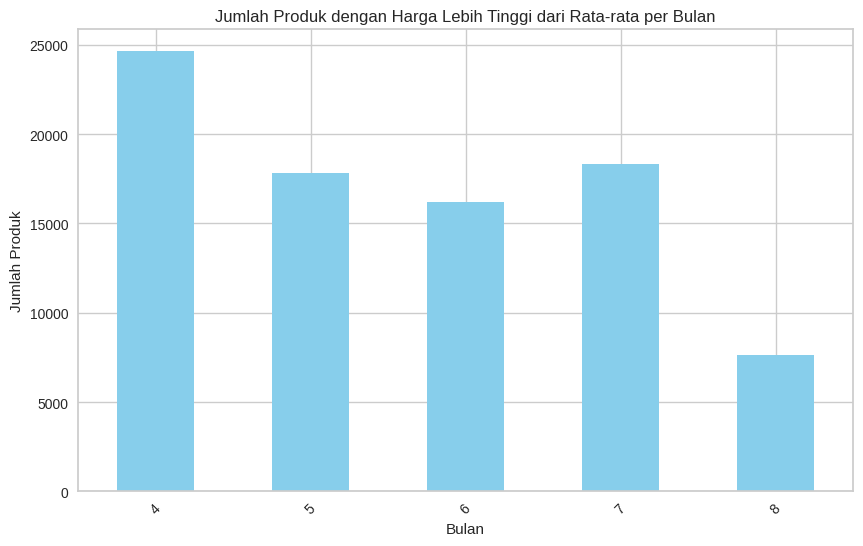

In [ ]:
high_price_df = df[df['price 2'] == 1]

# Menghitung jumlah produk dengan harga lebih tinggi dari rata-rata per bulan
high_price_month_count = high_price_df.groupby('month').size()

# Visualisasi data
plt.figure(figsize=(10, 6))
high_price_month_count.plot(kind='bar', color='skyblue')
plt.title('Jumlah Produk dengan Harga Lebih Tinggi dari Rata-rata per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=45)
plt.show()

Dari Visualisasi diatas kenaikan harga pada setiap kategori dengan jumlah produk paling tinggi berada pada bulan ke empat

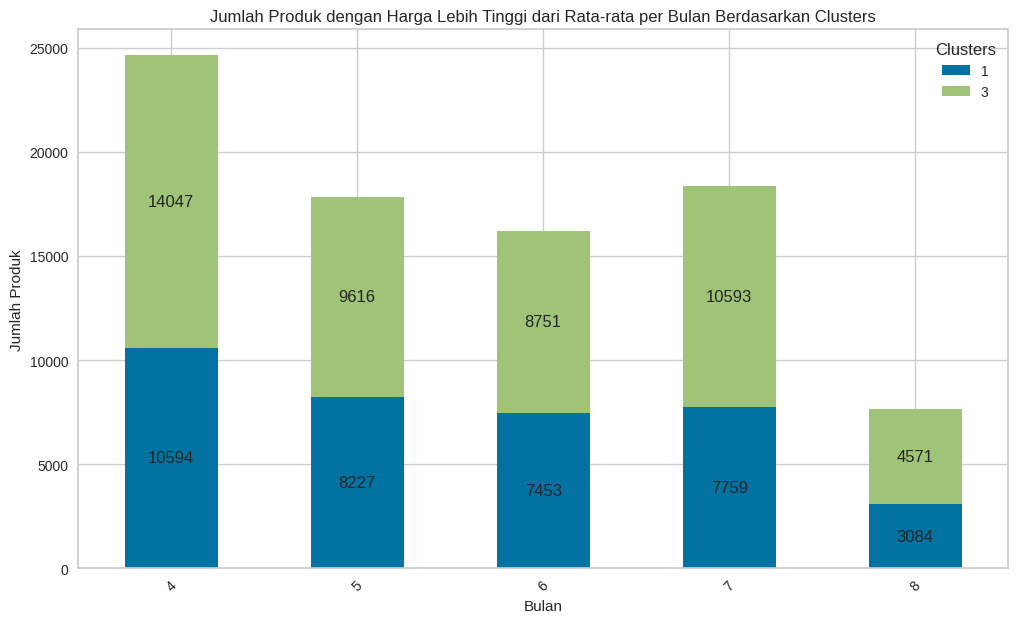

In [ ]:
high_price_df = df[df['price 2'] == 1]

# Menghitung jumlah produk dengan harga lebih tinggi dari rata-rata per bulan berdasarkan clusters
high_price_clusters_count = high_price_df.groupby(['month', 'Clusters']).size().unstack(fill_value=0)

# Visualisasi data jumlah produk per bulan berdasarkan clusters dengan total jumlah produk ditampilkan
ax = high_price_clusters_count.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Jumlah Produk dengan Harga Lebih Tinggi dari Rata-rata per Bulan Berdasarkan Clusters')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Produk')
plt.legend(title='Clusters')
plt.xticks(rotation=45)

# Menambahkan total jumlah produk di atas tiap batang
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()

Dari visualisasi diatas Cluster 1 dan 3 merupakan customer yang masih tertarik dengan produk walaupun harga lebih tinggi dari rata-rata per bulan

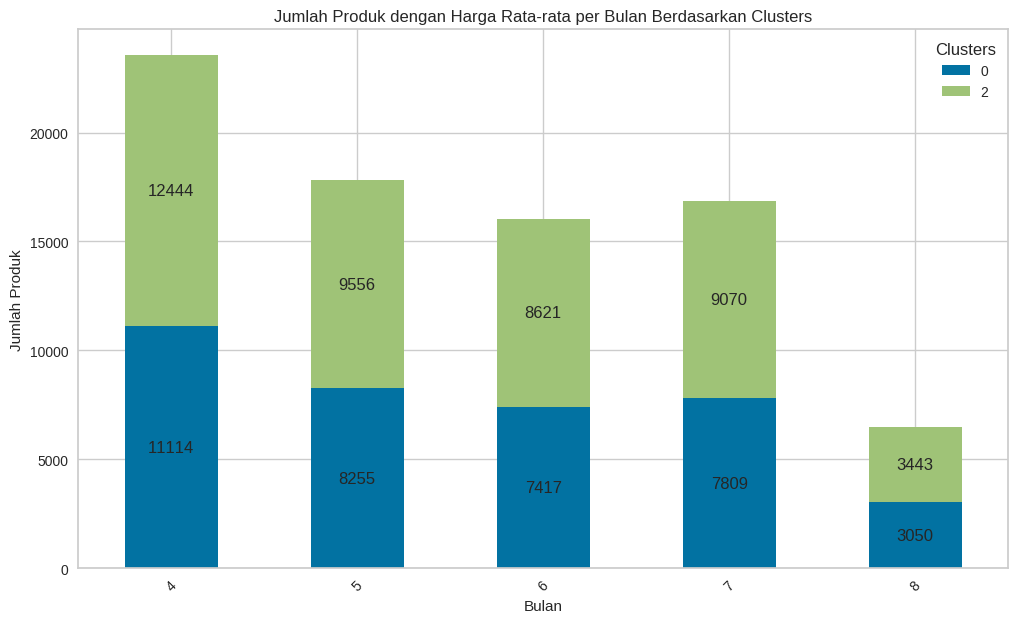

In [ ]:
low_price_df = df[df['price 2'] == 2]

# Menghitung jumlah produk dengan harga lebih tinggi dari rata-rata per bulan berdasarkan clusters
low_price_clusters_count = low_price_df.groupby(['month', 'Clusters']).size().unstack(fill_value=0)

# Visualisasi data jumlah produk per bulan berdasarkan clusters dengan total jumlah produk ditampilkan
ax = low_price_clusters_count.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Jumlah Produk dengan Harga Rata-rata per Bulan Berdasarkan Clusters')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Produk')
plt.legend(title='Clusters')
plt.xticks(rotation=45)

# Menambahkan total jumlah produk di atas tiap batang
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




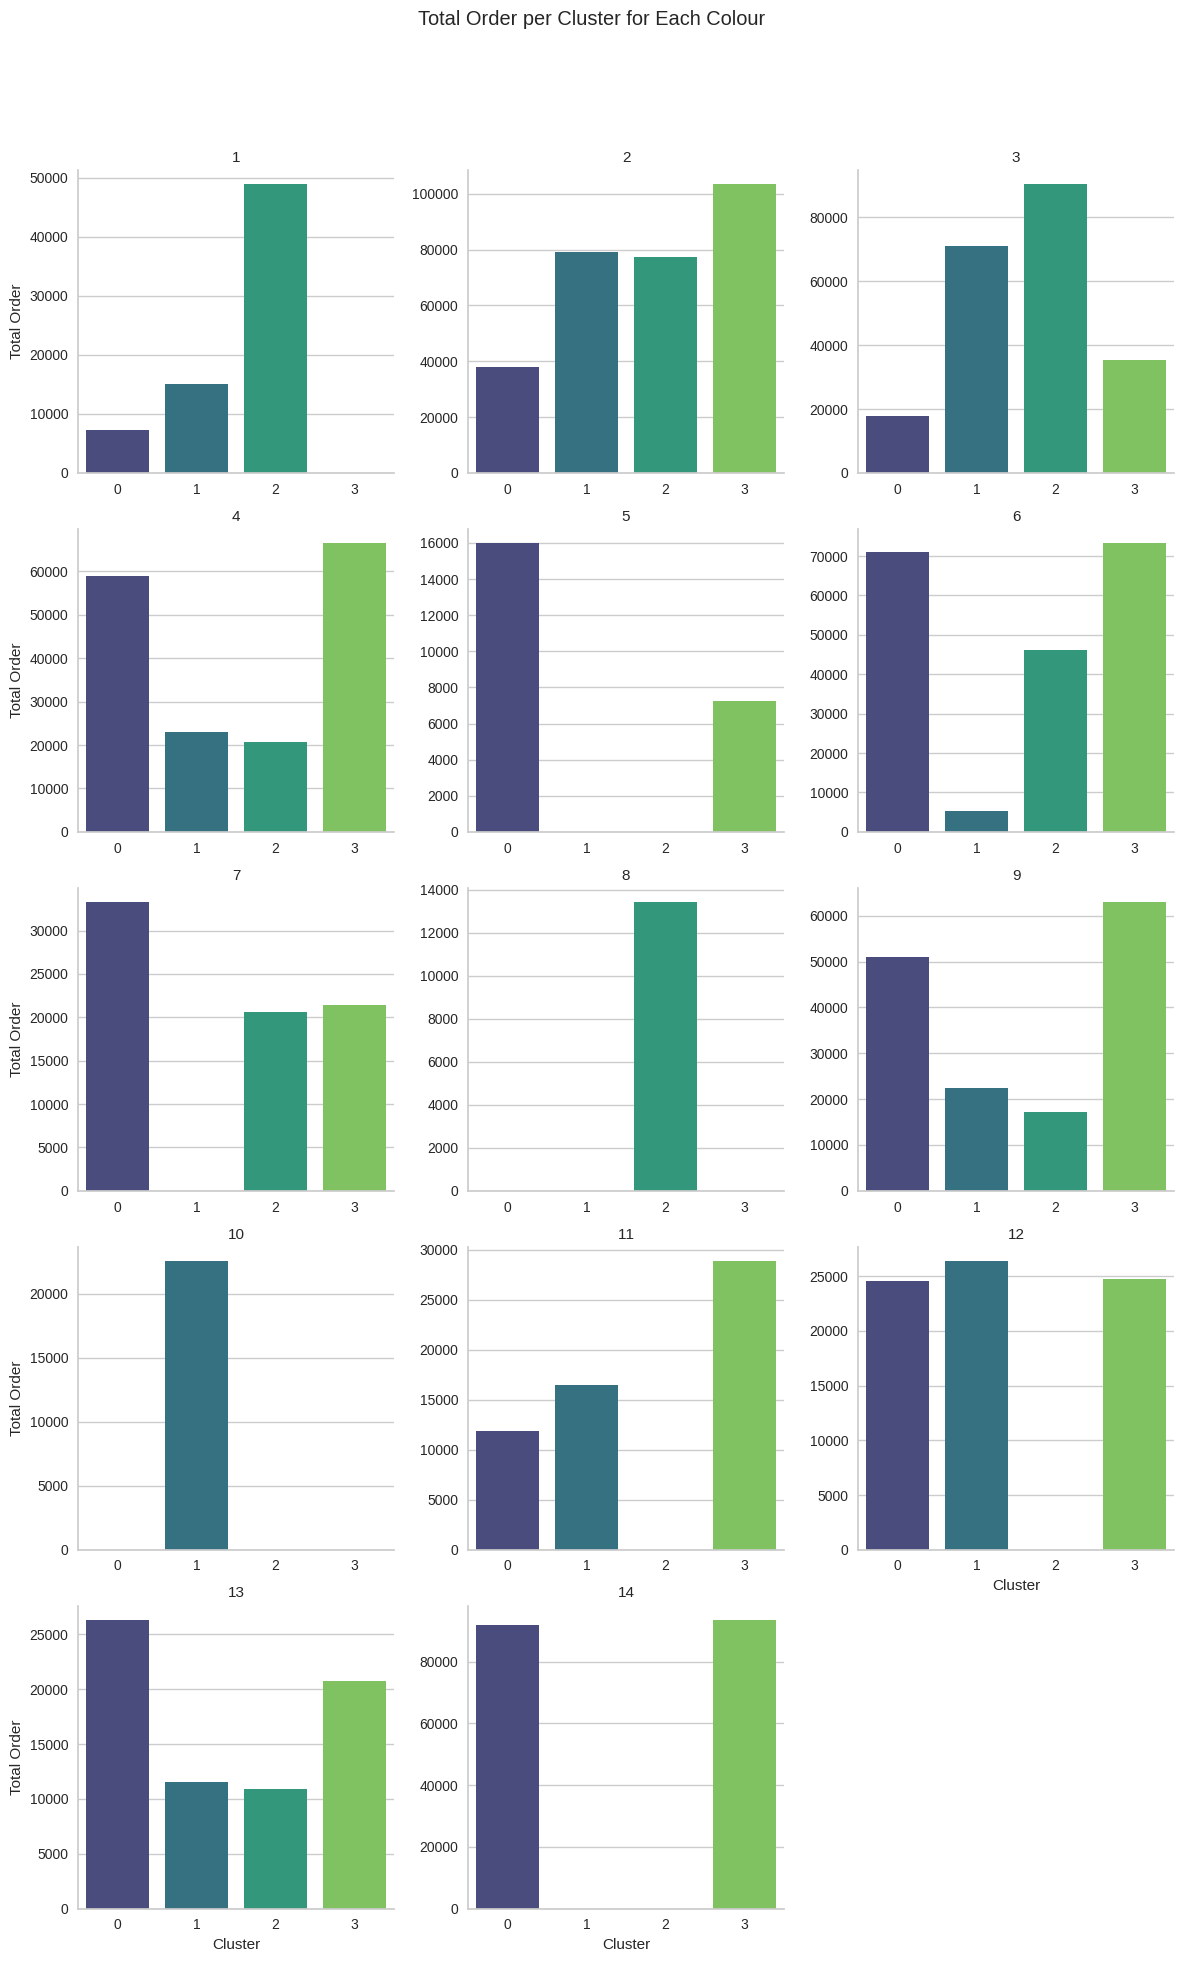

In [ ]:
grouped_df = df.groupby(['colour', 'Clusters']).sum().reset_index()

# Buat FacetGrid untuk memisahkan visualisasi berdasarkan 'colour'
g = sns.FacetGrid(grouped_df, col="colour", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.barplot, 'Clusters', 'order', order=grouped_df['Clusters'].unique(), palette='viridis')

# Tambahkan judul dan label untuk setiap plot
g.set_axis_labels('Cluster', 'Total Order')
g.set_titles(col_template='{col_name}')

# Tambahkan judul keseluruhan
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Total Order per Cluster for Each Colour')

plt.show()

- Cluster 0 dari visualisasi diatas memiliki ketertarikan warna violet, Green, dan burgundy berdasarkan click sequences / orders yang paling banyak.
- Cluster 1 diatas memiliki ketertarikan pada warna Olive, dan Red berdasarkan banyaknya order.
- Cluster 2 diatas memiliki ketertarikan pada warna beige, blue, dan navy blue berdasarkan click sequences / orders yang paling banyak.
- Cluster 3 diatas memiliki ketertarikan pada warna Black, Brown, Gray, Of Many Color, Pink, dan White berdasarkan banyaknya order.

In [ ]:
df1 = df.groupby(by=["page", "page 1 (main category)"]).size().reset_index(name="counts")

px.bar(data_frame=df1, x="page", y="counts",
       color="page 1 (main category)", barmode="group")

Observation
- page 1 : Impressive product (trousers in page 1)
- page 2 : Good product(Skirts)
- page 3: less interaction (blouses)
- page 4 and page 5 only for sale

In [ ]:
df1 = df.groupby(by=["page", "Clusters"]).size().reset_index(name="counts")

px.bar(data_frame=df1, x="page", y="counts",
       color="Clusters", barmode="group")

Observations :
- Pages 1 : User pada Cluster 2 lebih tertarik dengan product yang ada pada page 1
- Pages 2 : User pada Cluster 2 lebih tertarik dengan product yang ada pada pages 2
- Pages 3 : User pada Cluster 0 lebih tertarik dengan product yang ada pada pages 3
- Pages 4 & Pages 5 : user pada Cluster 3 lebih tertarik dengan product yang ada pada pages 4 & 5

In [ ]:
import plotly.express as px

# Menghitung jumlah data pada setiap kombinasi 'LOCATION', 'MODEL PHOTOGRAPHY', dan 'cluster'
df_agg = df.groupby(['location', 'model photography', 'Clusters']).size().reset_index(name='count')

# Membuat bar plot
fig = px.bar(
    df_agg,
    x='location',
    y='count',
    color='Clusters',
    barmode='group',
    facet_row='model photography',
    title="Visualisasi Kluster berdasarkan Lokasi dan Model Fotografi",
    labels={'location': 'Lokasi Foto', 'count': 'Jumlah', 'model photography': 'Model Fotografi'}
)

# Menyesuaikan tampilan sumbu X untuk label yang lebih deskriptif
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6],
        ticktext=['Top Left', 'Top Middle', 'Top Right', 'Bottom Left', 'Bottom Middle', 'Bottom Right']
    ),
    yaxis=dict(
        title='Jumlah'
    ),
    xaxis_title='Lokasi Foto'
)

fig.show()

1.   Model Foto en face :
- Cluster 1 Lebih tertarik pada foto yang berada di Top Middle, dan Top Right
- Cluster 2 lebih tertarik pada foto yang berada di Bottom Left, dan Bottom Middle
- Cluster 3 lebih tertarik pada foto yang berada di Top Left, dan Bottom Right

2.   Model Foto Profile :
- Cluster 0 lebih tertarik pada foto yang berada di Top Left, dan Top Right, dan Bottom Right
- Cluster 3 lebih tertarik pada foto yang berada di Bottom Middle, Top Middle, dan bottom left

Cluster 0 :
- Click paling tinggi berada pada cluster 0
- Kategori yang sering di click yaitu sale
- customer yang tertarik dengan produk yang memiliki rata-rata harga yang tidak tinggi
- memiliki ketertarikan warna violet, Green, dan burgundy berdasarkan click sequences / orders yang paling banyak.
- User pada Cluster 0 lebih tertarik dengan product Blouses yang ada pada pages 3
- Model Foto Grafi Foto Profile Cluster 0 lebih tertarik pada foto yang berada di Top Left, dan Top Right, dan Bottom Right

Cluster 1 :
- Tingkat spend setiap country paling tinggi berada pada cluster 1
- Kategori yang sering di click yaitu Skirts
- customer yang masih tertarik dengan produk walaupun harga lebih tinggi dari rata-rata per bulan
- memiliki ketertarikan pada warna Olive, dan Red berdasarkan banyaknya order.
- User pada Cluster 1 lebih tertarik dengan product Trousers dan Skirts yang ada pada pages 1 & 2 walaupun kalah jumlah dengan cluster 2
- Model Foto Grafi Foto en face Cluster 1 Lebih tertarik pada foto yang berada di Top Middle, dan Top Right

Cluster 2 :
- Kategori yang sering di click yaitu trousers
- customer yang tertarik dengan produk yang memiliki rata-rata harga yang tidak tinggi
- memiliki ketertarikan pada warna beige, blue, dan navy blue berdasarkan click sequences / orders yang paling banyak.
- user pada Cluster 2 lebih tertarik dengan product Trousers & Skirts yang ada pada pages 1 & 2
- Model Foto Grafi Foto en face Cluster 2 Lebih tertarik pada foto yang berada di Bottom Left, dan Bottom Middle

Cluster 3 :
- Kategori yang sering di click yaitu Sale
- customer yang masih tertarik dengan produk walaupun harga lebih tinggi dari rata-rata per bulan
- memiliki ketertarikan pada warna Black, Brown, Gray, Of Many Color, Pink, dan White berdasarkan banyaknya order.
- User pada Cluster 3 lebih tertarik dengan product Sale yang ada pada pages 4 & 5
- Model Foto Grafi Foto en face Cluster 3 Lebih tertarik pada foto yang berada di Top Left, dan Bottom Right
- Model Foto Grafi Foto Profile Cluster 3 Lebih tertarik pada foto yang berada di Bottom left, Top Middle, Bottom Middle

**Evaluasi Model**

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(PCA_ds, yhat_kmean)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.787229457110333
